In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/dataset/final_experiment_avg_df.csv')


def create_tables_by_velocity_position(df):
    tables = {}
    unique_velocities = df['velocity'].unique()
    unique_positions = df['position'].unique()

    print(unique_velocities)
    print(unique_positions)
    
    for velocity in unique_velocities:
        for position in unique_positions:
            # Filter the DataFrame based on the current combination of velocity and position
            filtered_df = df[(df['velocity'] == int(velocity)) & (df['position'] == int(position))]
            
            # Create a dynamic name for the DataFrame based on velocity and position
            table_name = f"df_{int(velocity)}_{int(position)}"
            tables[table_name] = filtered_df
    
    return tables

tables_dict = create_tables_by_velocity_position(df)
print(tables_dict)
def calculate_smoothed_displacement(df, window_size=5):
    df['smoothed_displacement'] = df['displacement'].rolling(window=window_size, center=True).mean()
    # Set the first and last values as per previous conditions
    if len(df) > 1:
        first_value = df['displacement'].iloc[0]
        connect_value = df['smoothed_displacement'].iloc[window_size]
        linear_interp_start = np.linspace(first_value, connect_value, num=window_size)
        df['smoothed_displacement'].iloc[:window_size] = linear_interp_start

        # Last section: Linearly connect from the smoothed value before window_size to the last value
        last_value = df['displacement'].iloc[-1]
        connect_value_end = df['smoothed_displacement'].iloc[-(window_size + 1)]
        linear_interp_end = np.linspace(connect_value_end, last_value, num=window_size)
        df['smoothed_displacement'].iloc[-window_size:] = linear_interp_end
    return df

# df_160_r_2 = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == 2)]
# df_160_r_2['smoothed_displacement'] = df_160_r_2.apply(calculate_smoothed_displacement, axis=1)

# Apply smoothing to each table in tables_dict and store results
for table_name, table_df in tables_dict.items():
    # Apply the smoothing function
    tables_dict[table_name] = calculate_smoothed_displacement(table_df, 5)

# Combine all tables back into a single DataFrame based on 'id'
combined_df = pd.concat(tables_dict.values(), ignore_index=True)

# Sort the combined DataFrame by 'id' to maintain order if needed
combined_df = combined_df.sort_values(by='id').reset_index(drop=True)

average_df = (
    combined_df.groupby(['velocity', 'Cycle_Number'])
    .agg({
        'Period': 'mean',
        'experiment_number': 'mean',
        'position': 'mean',  # Assuming it's numerical (like 1 for right, 0 for left)
        'displacement': 'mean',
        'smoothed_displacement': 'mean'
    })
    .reset_index()
)

average_df


[160. 210. 270. 320. 360. 380.]
[0. 1.]
{'df_160_0':       id  velocity       Period  Cycle_Number  experiment_number  position  \
0      0     160.0    300.65650       1772.25                4.5       0.0   
1      1     160.0    601.11325       3009.75                4.5       0.0   
2      2     160.0    901.65225       4246.75                4.5       0.0   
3      3     160.0   1202.14075       5483.50                4.5       0.0   
4      4     160.0   1502.75775       6721.00                4.5       0.0   
..   ...       ...          ...           ...                ...       ...   
156  156     160.0  47182.42950     194768.75                4.5       0.0   
157  157     160.0  47482.93375     196004.00                4.5       0.0   
158  158     160.0  47783.59375     197242.75                4.5       0.0   
159  159     160.0  48084.02750     198479.50                4.5       0.0   
160  160     160.0  48384.71475     199717.25                4.5       0.0   

     displ

C:\Users\alira\AppData\Local\Temp\ipykernel_30168\2281149863.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_displacement'] = df['displacement'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_30168\2281149863.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame

,velocity,Cycle_Number,Period,experiment_number,position,displacement,smoothed_displacement
0,160.0,1772.25,300.65650,4.5,0.5,0.000200,0.000200
1,160.0,3009.75,601.11325,4.5,0.5,0.000201,0.000199
2,160.0,4246.75,901.65225,4.5,0.5,0.000195,0.000198
3,160.0,5483.50,1202.14075,4.5,0.5,0.000196,0.000197
4,160.0,6721.00,1502.75775,4.5,0.5,0.000197,0.000196
...,...,...,...,...,...,...,...
593,380.0,188809.50,19230.41400,6.5,0.5,0.000258,0.000261
594,380.0,191746.00,19530.91400,6.5,0.5,0.000264,0.000260
595,380.0,194684.50,19831.52350,6.5,0.5,0.000261,0.000260
596,380.0,197626.00,20132.34350,6.5,0.5,0.000256,0.000260


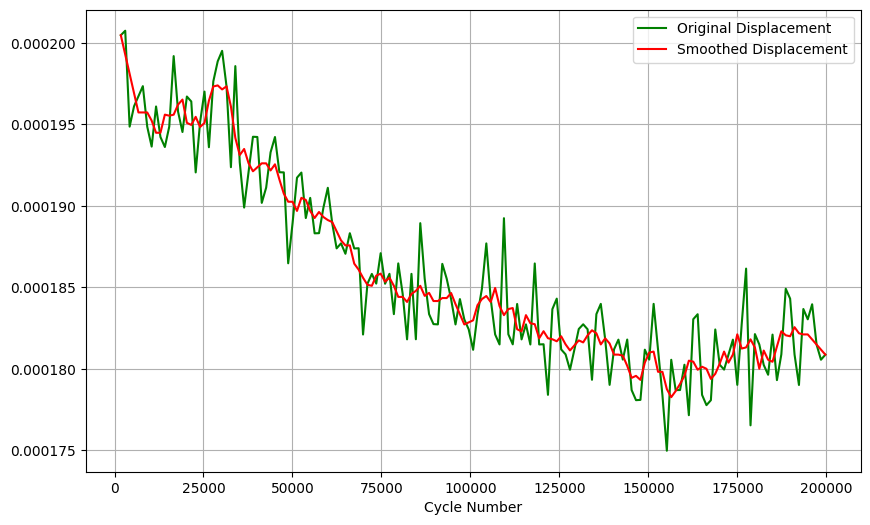

In [50]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on position and velocity, and plot
df = average_df[average_df['velocity'] == 160]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['displacement'], label='Original Displacement', color='green')
plt.plot(df['Cycle_Number'], df['smoothed_displacement'], label='Smoothed Displacement', color='red')
plt.xlabel("Cycle Number")
plt.legend()
plt.grid()
plt.show()

In [9]:
import pandas as pd
import numpy as np

def calculate_smoothed_displacement(row, window_size=10):
    data = pd.to_numeric(row[19:139], errors='coerce')  # Adjusted column range
    smoothed_data = data.rolling(window=window_size, center=True).mean()

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    return max_value_smoothed - min_value_smoothed

datasets = ['df_160', 'df_210', 'df_270', 'df_320', 'df_360', 'df_380']

dfs = {}
for dataset in datasets:
    dfs[dataset] = pd.read_csv(f'../dataset/velocity_dfs/data_velocity_{dataset.split("_")[1]}.csv')

for dataset in dfs:
    dfs[dataset]['smoothed_displacement'] = dfs[dataset].apply(calculate_smoothed_displacement, axis=1)

combined_df = pd.concat(dfs.values(), ignore_index=True)

print(combined_df.head())

                  Date    Period  2  Cycle_Number  4   5  6  7  velocity  \
0  26/01/2005 17:49:45   300.641  0          1542  1  15  1  1     160.0   
1  26/01/2005 17:54:45   600.656  0          2777  1  15  1  1     160.0   
2  26/01/2005 17:59:46   901.156  0          4014  1  15  1  1     160.0   
3  26/01/2005 18:04:46  1201.391  0          5249  1  15  1  1     160.0   
4  26/01/2005 18:09:46  1502.000  0          6489  1  15  1  1     160.0   

          9  ...       134       135       136       137       138  139  \
0  4.116579  ...  0.003542  0.003542  0.003572  0.003522  0.003562  NaN   
1  4.116579  ...  0.003542  0.003592  0.003522  0.003562  0.003552  NaN   
2  4.116579  ...  0.003582  0.003542  0.003552  0.003622  0.003512  NaN   
3  4.116579  ...  0.003542  0.003592  0.003532  0.003552  0.003592  NaN   
4  4.116579  ...  0.003572  0.003592  0.003532  0.003582  0.003572  NaN   

   experiment_number  position  displacement  smoothed_displacement  
0                  2  

In [10]:
combined_df

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,0,188595,1,14,1,1,380.0,9.776876,...,-0.001156,-0.001136,-0.001186,-0.001117,-0.001117,NaN,7,Left,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,0,191533,1,14,1,1,380.0,9.776876,...,-0.001186,-0.001136,-0.001127,-0.001166,-0.001117,NaN,7,Left,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,0,194473,1,14,1,1,380.0,9.776876,...,-0.001206,-0.001127,-0.001136,-0.001176,-0.001107,NaN,7,Left,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,0,197411,1,14,1,1,380.0,9.776876,...,-0.001146,-0.001127,-0.001166,-0.001107,-0.001107,NaN,7,Left,0.000282,0.000243


In [4]:
if 'position' in df_160.columns and 'experiment_number' in df_160.columns:

    experiment_numbers = df_160['experiment_number'].unique()
    
    experiment_dataframes = {}

    for experiment in experiment_numbers:

        df_right = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == experiment)]

        df_left = df_160[(df_160['position'] == 'Left') & (df_160['experiment_number'] == experiment)]
        
        experiment_dataframes[f"experiment_{experiment}_right"] = df_right
        experiment_dataframes[f"experiment_{experiment}_left"] = df_left

else:
    print("The required columns 'position' and 'experiment_number' are missing.")


In [5]:
experiment_dataframes.keys()

dict_keys(['experiment_2_right', 'experiment_2_left', 'experiment_3_right', 'experiment_3_left', 'experiment_6_right', 'experiment_6_left', 'experiment_7_right', 'experiment_7_left'])

In [7]:
experiment_dataframes["experiment_2_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,27/01/2005 06:51:04,47179.187,0,194525,1,15,1,1,160.0,4.116579,...,0.003801,0.003751,0.003741,0.003761,0.003741,NaN,2,Right,0.000185,0.000161
157,27/01/2005 06:56:04,47479.891,0,195763,1,15,1,1,160.0,4.116579,...,0.003731,0.003791,0.003751,0.003771,0.003791,NaN,2,Right,0.000190,0.000169
158,27/01/2005 07:01:05,47780.484,0,197001,1,15,1,1,160.0,4.116579,...,0.003781,0.003761,0.003731,0.003801,0.003741,NaN,2,Right,0.000195,0.000166
159,27/01/2005 07:06:05,48080.625,0,198236,1,15,1,1,160.0,4.116579,...,0.003692,0.003781,0.003761,0.003751,0.003791,NaN,2,Right,0.000185,0.000157


In [8]:
experiment_dataframes["experiment_2_left"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
161,26/01/2005 17:49:45,300.641,0,1542,1,14,1,1,160.0,4.116579,...,0.004022,0.004081,0.004012,0.004052,0.004052,NaN,2,Left,0.000212,0.000196
162,26/01/2005 17:54:45,600.656,0,2777,1,14,1,1,160.0,4.116579,...,0.004042,0.004062,0.004002,0.004072,0.004062,NaN,2,Left,0.000225,0.000198
163,26/01/2005 17:59:46,901.156,0,4014,1,14,1,1,160.0,4.116579,...,0.004032,0.004081,0.004042,0.004052,0.004081,NaN,2,Left,0.000220,0.000199
164,26/01/2005 18:04:46,1201.391,0,5249,1,14,1,1,160.0,4.116579,...,0.004012,0.004072,0.004062,0.004032,0.004081,NaN,2,Left,0.000227,0.000204
165,26/01/2005 18:09:46,1502.000,0,6489,1,14,1,1,160.0,4.116579,...,0.004101,0.004032,0.004062,0.004091,0.004032,NaN,2,Left,0.000220,0.000197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,27/01/2005 06:51:04,47179.187,0,194525,1,14,1,1,160.0,4.116579,...,0.004269,0.004259,0.004279,0.004269,0.004249,NaN,2,Left,0.000188,0.000163
318,27/01/2005 06:56:04,47479.891,0,195763,1,14,1,1,160.0,4.116579,...,0.004259,0.004299,0.004220,0.004289,0.004309,NaN,2,Left,0.000203,0.000177
319,27/01/2005 07:01:05,47780.484,0,197001,1,14,1,1,160.0,4.116579,...,0.004240,0.004259,0.004299,0.004230,0.004279,NaN,2,Left,0.000190,0.000165
320,27/01/2005 07:06:05,48080.625,0,198236,1,14,1,1,160.0,4.116579,...,0.004299,0.004240,0.004279,0.004289,0.004240,NaN,2,Left,0.000183,0.000159


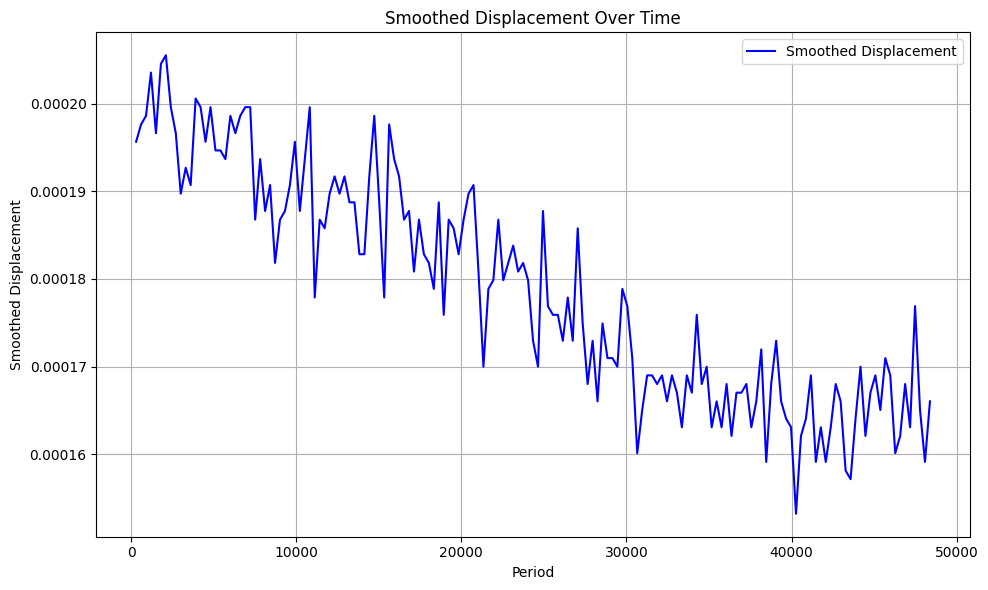

In [5]:
# Plotting smoothed displacement vs Period

import matplotlib.pyplot as plt
def plot(df):

    df_160['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    # Plot smoothed displacement over time (Period)
    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_displacement'], label='Smoothed Displacement', color='blue')
    plt.xlabel('Period')
    plt.ylabel('Smoothed Displacement')
    plt.title('Smoothed Displacement Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot(experiment_dataframes["experiment_2_left"])

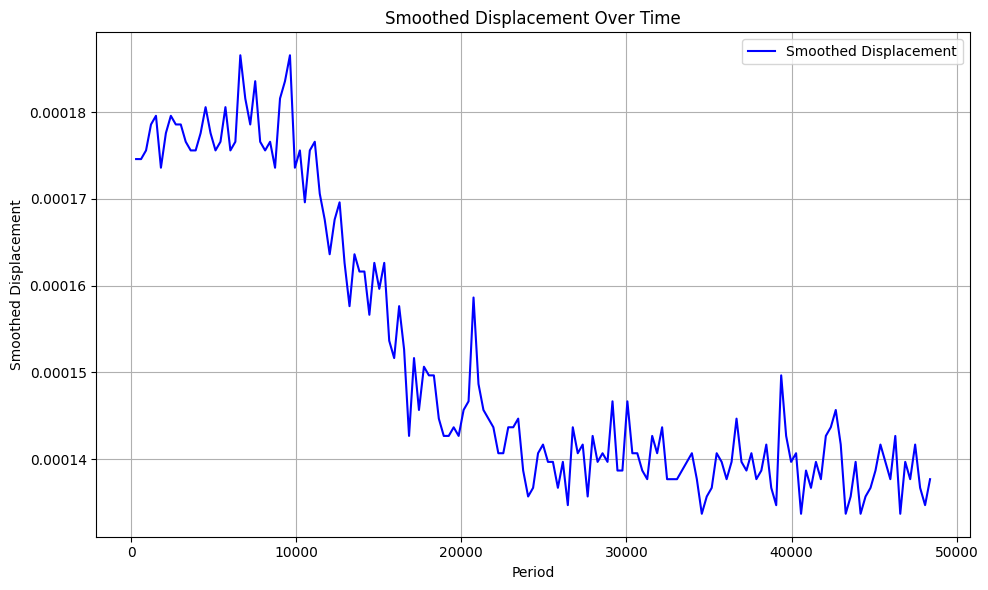

In [6]:
plot(experiment_dataframes["experiment_6_right"])

In [7]:
len(experiment_dataframes["experiment_2_right"])

161

C:\Users\alira\AppData\Local\Temp\ipykernel_13992\3315541842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')


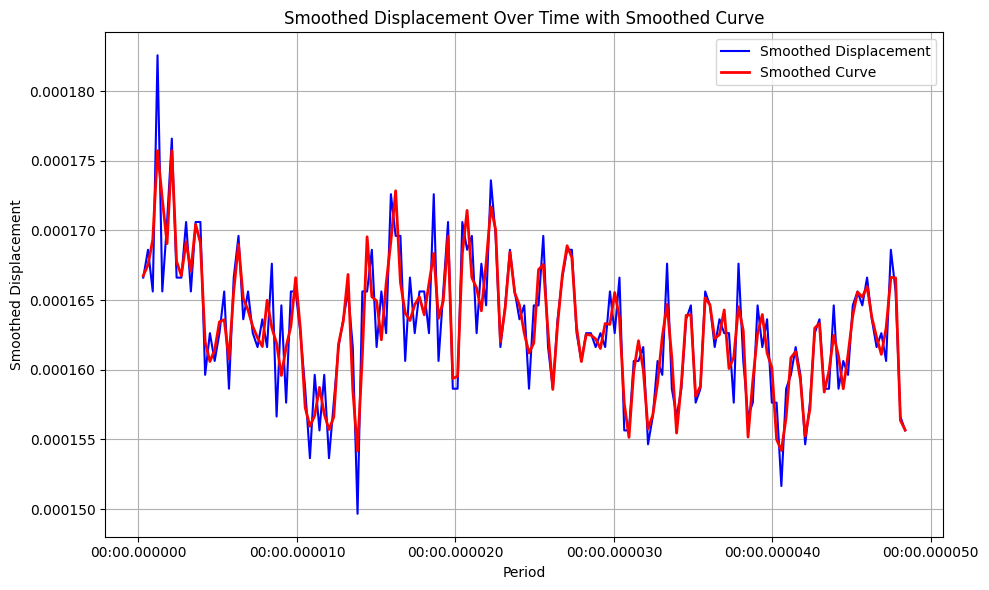

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_with_smoothing(df):
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
    
    smoothed_curve = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=8)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_displacement'], label='Smoothed Displacement', color='blue')
    
    plt.plot(df['Period'], smoothed_curve, label='Smoothed Curve', color='red', linewidth=2)
    
    plt.xlabel('Period')
    plt.ylabel('Smoothed Displacement')
    plt.title('Smoothed Displacement Over Time with Smoothed Curve')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_with_smoothing(experiment_dataframes["experiment_2_right"])


In [27]:
from scipy.signal import savgol_filter

def add_smoothed_curve_to_all(dataframes):
    for key, df in dataframes.items():
        df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

        df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=4)

        dataframes[key] = df

    return dataframes

experiment_dataframes = add_smoothed_curve_to_all(experiment_dataframes)




C:\Users\alira\AppData\Local\Temp\ipykernel_13992\360447306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
C:\Users\alira\AppData\Local\Temp\ipykernel_13992\360447306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=4)
C:\Users\alira\AppData\Local\Temp\ipykernel_13992\360447306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [28]:
experiment_dataframes["experiment_7_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement,smoothed_curve
966,21/06/2005 18:05:40,1970-01-01 00:00:00.000000300,0,1764,1,15,1,1,160.0,4.116579,...,0.002664,0.002704,0.002644,0.002684,NaN,7,Right,0.000182,0.000160,0.000160
967,21/06/2005 18:10:40,1970-01-01 00:00:00.000000600,0,2998,1,15,1,1,160.0,4.116579,...,0.002694,0.002664,0.002684,0.002694,NaN,7,Right,0.000182,0.000167,0.000166
968,21/06/2005 18:15:41,1970-01-01 00:00:00.000000900,0,4236,1,15,1,1,160.0,4.116579,...,0.002684,0.002674,0.002684,0.002704,NaN,7,Right,0.000187,0.000168,0.000166
969,21/06/2005 18:20:41,1970-01-01 00:00:00.000001201,0,5468,1,15,1,1,160.0,4.116579,...,0.002664,0.002714,0.002674,0.002694,NaN,7,Right,0.000177,0.000160,0.000164
970,21/06/2005 18:25:42,1970-01-01 00:00:00.000001502,0,6708,1,15,1,1,160.0,4.116579,...,0.002694,0.002704,0.002714,0.002684,NaN,7,Right,0.000177,0.000164,0.000161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,22/06/2005 07:07:03,1970-01-01 00:00:00.000047183,0,194765,1,15,1,1,160.0,4.116579,...,0.002863,0.002784,0.002824,0.002833,NaN,7,Right,0.000160,0.000133,0.000130
1123,22/06/2005 07:12:03,1970-01-01 00:00:00.000047483,0,195997,1,15,1,1,160.0,4.116579,...,0.002824,0.002843,0.002784,0.002863,NaN,7,Right,0.000152,0.000127,0.000131
1124,22/06/2005 07:17:04,1970-01-01 00:00:00.000047784,0,197238,1,15,1,1,160.0,4.116579,...,0.002873,0.002784,0.002843,0.002814,NaN,7,Right,0.000152,0.000134,0.000133
1125,22/06/2005 07:22:05,1970-01-01 00:00:00.000048085,0,198477,1,15,1,1,160.0,4.116579,...,0.002833,0.002814,0.002843,0.002863,NaN,7,Right,0.000157,0.000136,0.000135


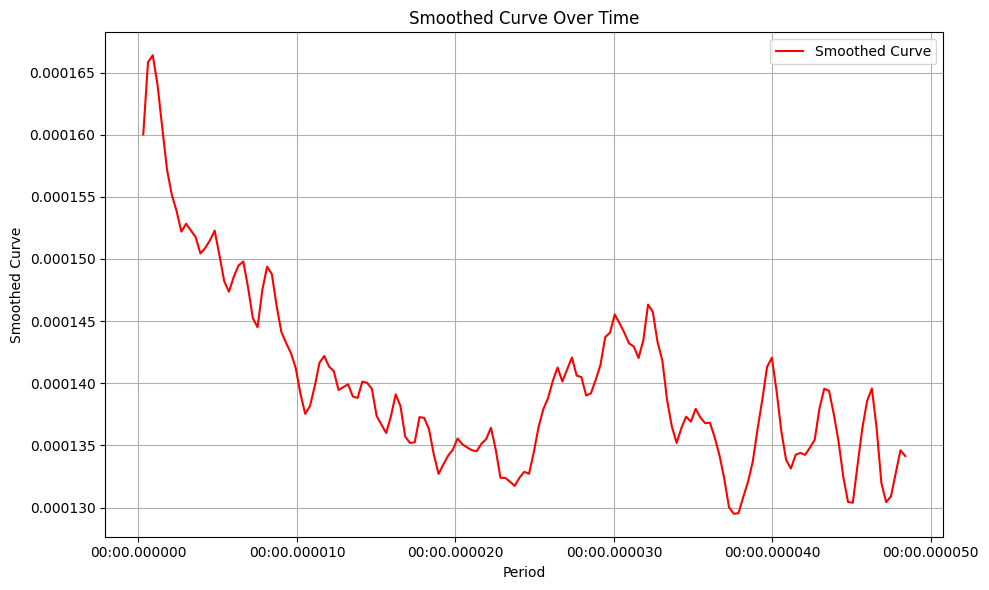

In [29]:
def plot_curve(df):

    df_160['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    # Plot smoothed displacement over time (Period)
    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_curve'], label='Smoothed Curve', color='red')
    plt.xlabel('Period')
    plt.ylabel('Smoothed Curve')
    plt.title('Smoothed Curve Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_curve(experiment_dataframes["experiment_7_right"])

In [30]:
experiment_dataframes["experiment_3_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement,smoothed_curve
322,18/02/2005 14:43:01,1970-01-01 00:00:00.000000300,0,1972,1,15,1,1,160.0,4.116579,...,0.001926,0.001936,0.001886,0.001926,NaN,3,Right,0.000232,0.000207,0.000204
323,18/02/2005 14:48:02,1970-01-01 00:00:00.000000601,0,3211,1,15,1,1,160.0,4.116579,...,0.001995,0.001946,0.001985,0.001975,NaN,3,Right,0.000205,0.000179,0.000183
324,18/02/2005 14:53:02,1970-01-01 00:00:00.000000902,0,4449,1,15,1,1,160.0,4.116579,...,0.001995,0.002015,0.001975,0.002005,NaN,3,Right,0.000202,0.000176,0.000174
325,18/02/2005 14:58:03,1970-01-01 00:00:00.000001202,0,5687,1,15,1,1,160.0,4.116579,...,0.002015,0.001956,0.002025,0.001965,NaN,3,Right,0.000192,0.000172,0.000173
326,18/02/2005 15:03:03,1970-01-01 00:00:00.000001503,0,6921,1,15,1,1,160.0,4.116579,...,0.001995,0.002005,0.002015,0.001965,NaN,3,Right,0.000200,0.000182,0.000175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,19/02/2005 03:44:21,1970-01-01 00:00:00.000047181,0,194963,1,15,1,1,160.0,4.116579,...,0.002315,0.002285,0.002325,0.002275,NaN,3,Right,0.000195,0.000171,0.000170
479,19/02/2005 03:49:22,1970-01-01 00:00:00.000047481,0,196196,1,15,1,1,160.0,4.116579,...,0.002265,0.002305,0.002305,0.002255,NaN,3,Right,0.000195,0.000173,0.000171
480,19/02/2005 03:54:22,1970-01-01 00:00:00.000047781,0,197433,1,15,1,1,160.0,4.116579,...,0.002275,0.002335,0.002295,0.002285,NaN,3,Right,0.000190,0.000170,0.000171
481,19/02/2005 03:59:22,1970-01-01 00:00:00.000048082,0,198670,1,15,1,1,160.0,4.116579,...,0.002275,0.002335,0.002295,0.002305,NaN,3,Right,0.000192,0.000171,0.000171


In [31]:
# import numpy as np
# from scipy.signal import savgol_filter

# def remove_initial_outliers(df, column_name, threshold=3):
#     # Compute the difference between consecutive points
#     diffs = np.abs(np.diff(df[column_name]))

#     # Identify outliers where the difference is significantly larger than the next point
#     for i in range(len(diffs) - 1):
#         if diffs[i] > threshold * diffs[i + 1]:
#             # Drop the outlier row
#             df = df.iloc[i+1:].reset_index(drop=True)
#         else:
#             break  # Stop if no further outliers are detected

#     return df

# def add_smoothed_curve_to_all(dataframes, threshold=3):
#     # Loop through each dataframe in the dictionary
#     for key, df in dataframes.items():
#         # Ensure 'Period' is in datetime format
#         df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

#         # Remove initial outliers in the 'smoothed_displacement' column
#         df = remove_initial_outliers(df, 'smoothed_displacement', threshold)

#         # Apply Savitzky-Golay filter to the 'smoothed_displacement' column
#         df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)

#         # Update the dataframe with the new smoothed curve column and outlier removal
#         dataframes[key] = df

#     return dataframes

# # Apply to all keys in experiment_dataframes
# experiment_dataframes = add_smoothed_curve_to_all(experiment_dataframes, threshold=8)


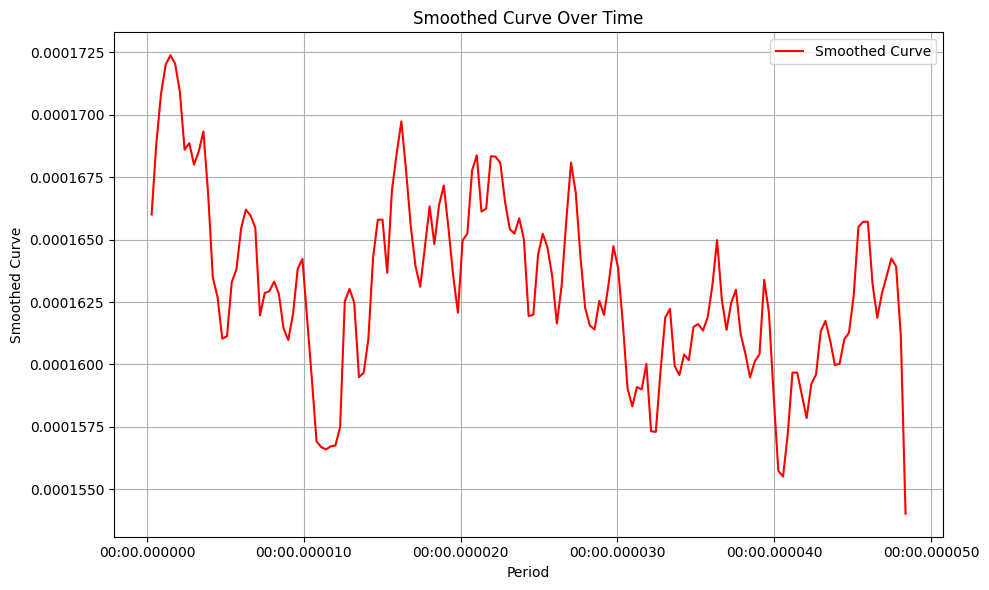

In [32]:
plot_curve(experiment_dataframes["experiment_2_right"])

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = df_160[['velocity', 'Cycle_Number', 'experiment_number']]
y = df_160['displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display the MSE
mse


np.float64(1.9952529161563655e-10)

In [34]:
df_160

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,1970-01-01 00:00:00.000000300,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,1970-01-01 00:00:00.000000600,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,1970-01-01 00:00:00.000000901,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1970-01-01 00:00:00.000001201,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1970-01-01 00:00:00.000001502,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,22/06/2005 07:07:03,NaT,0,194765,1,14,1,1,160.0,4.116579,...,0.004744,0.004704,0.004694,0.004734,0.004674,NaN,7,Left,0.000180,0.000154
1284,22/06/2005 07:12:03,NaT,0,195997,1,14,1,1,160.0,4.116579,...,0.004704,0.004724,0.004694,0.004734,0.004704,NaN,7,Left,0.000170,0.000149
1285,22/06/2005 07:17:04,NaT,0,197238,1,14,1,1,160.0,4.116579,...,0.004714,0.004724,0.004684,0.004724,0.004724,NaN,7,Left,0.000178,0.000158
1286,22/06/2005 07:22:05,NaT,0,198477,1,14,1,1,160.0,4.116579,...,0.004694,0.004724,0.004714,0.004674,0.004753,NaN,7,Left,0.000170,0.000148


In [35]:
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],  # replace with the actual velocity value
    'Cycle_Number': [2777],  # replace with the actual cycle number value
    'experiment_number': [2]  # replace with the actual experiment number value
})

# Predict the displacement
predicted_displacement = model.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


Predicted Displacement: 0.00021265461993216317



Score


In [36]:
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)  # Predicted displacement values

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.5545350723323619


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = df_160[['velocity', 'Cycle_Number', 'experiment_number']]
y = df_160['smoothed_displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display the MSE
mse


np.float64(1.8000736181544116e-10)

In [38]:
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],  # replace with the actual velocity value
    'Cycle_Number': [2777],  # replace with the actual cycle number value
    'experiment_number': [2]  # replace with the actual experiment number value
})

# Predict the displacement
predicted_displacement = model.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


Predicted Displacement: 0.0001890356223356298


In [39]:
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)  # Predicted displacement values

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.5618957704136234


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into features (X) and target (y)
X = df_160[['velocity', 'Cycle_Number', 'experiment_number']]
y = df_160['smoothed_displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model using K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_mse_scores = -cv_scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(cv_mse_scores)
std_mse = np.std(cv_mse_scores)

# Fit the model on the entire training set after validation
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Display the Cross-Validation results and test set MSE
print(f"Cross-Validation Mean MSE: {mean_mse}")
print(f"Cross-Validation Standard Deviation MSE: {std_mse}")
print(f"Test Set MSE: {mse_test}")


Cross-Validation Mean MSE: 1.887742928574606e-10
Cross-Validation Standard Deviation MSE: 1.8043599348435454e-11
Test Set MSE: 1.8000736181544116e-10


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, y_pred)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)

# Display the test set MSE and R-squared score
print(f"Test Set MSE: {mse_test}")
print(f"R-squared Score on Test Set: {r2}")


Test Set MSE: 1.8000736181544116e-10
R-squared Score on Test Set: 0.5618957704136234


In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data (features and target)
X = df_160[['velocity', 'Cycle_Number']]
y = df_160['smoothed_displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100000, learning_rate=0.5, max_depth=5)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.1189105184741674e-10


In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Display the scores
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 4.1189105184741674e-10
R-squared Score: -0.0024657331967827822


In [ ]:
CONVERT experiment number to one hot encoding

convert the side right and left to 0 and 1